In [4]:
import pandas as pd
import geopandas as gpd

#traffic volume csv
traffic=pd.read_csv('https://raw.githubusercontent.com/AlejandraZS10/capstone_project/master/data/Traffic_Volume_Counts__2014-2019_.csv')
traffic.head(10)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324
5,62,158447,Broadway,West 242 Street,240 Street,NB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324
6,62,255653,Broadway,West 242 Street,240 Street,SB,09/13/2014,87.0,86.0,78.0,...,200,200,209,175,181,167,144,129,112,103
7,71,139620,Bronx River Parkway,Bronx River,East Gun Hill Road,NB,09/13/2014,802.0,445.0,388.0,...,2933,2904,2699,2877,2947,2532,2193,1820,1677,1331
8,71,139618,Bronx River Parkway,East Gun Hill Road,Bronx River,SB,09/13/2014,618.0,345.0,309.0,...,2676,2848,2680,2581,2274,2054,1762,1534,1308,1107
9,76,70364,Brook Avenue,East 152 Street,East 153 Street,SB,09/13/2014,79.0,58.0,41.0,...,288,300,301,305,294,222,183,134,129,97


In [5]:
# get the basic data info
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27289 entries, 0 to 27288
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             27289 non-null  int64  
 1   Segment ID     27289 non-null  int64  
 2   Roadway Name   27289 non-null  object 
 3   From           27289 non-null  object 
 4   To             27289 non-null  object 
 5   Direction      27289 non-null  object 
 6   Date           27289 non-null  object 
 7   12:00-1:00 AM  27285 non-null  float64
 8   1:00-2:00AM    27285 non-null  float64
 9   2:00-3:00AM    27285 non-null  float64
 10  3:00-4:00AM    27285 non-null  float64
 11  4:00-5:00AM    27285 non-null  float64
 12  5:00-6:00AM    27285 non-null  float64
 13  6:00-7:00AM    27285 non-null  float64
 14  7:00-8:00AM    27285 non-null  float64
 15  8:00-9:00AM    27285 non-null  float64
 16  9:00-10:00AM   27285 non-null  float64
 17  10:00-11:00AM  27286 non-null  float64
 18  11:00-

In [6]:
traffic['Date']=pd.to_datetime(traffic.Date, format="%m/%d/%Y")

In [7]:
traffic['year'] = traffic['Date'].dt.year

traffic['month'] = traffic['Date'].dt.month

traffic['day'] = traffic['Date'].dt.day

traffic.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,year,month,day
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,2014-09-13,204.0,177.0,133.0,...,546,582,528,432,328,282,240,2014,9,13
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,2014-09-13,140.0,51.0,128.0,...,362,418,335,282,247,237,191,2014,9,13
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,2014-09-13,94.0,73.0,65.0,...,236,213,190,199,183,147,103,2014,9,13
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,2014-09-13,88.0,82.0,75.0,...,240,217,198,186,162,157,103,2014,9,13
4,62,147673,Broadway,West 242 Street,240 Street,SB,2014-09-13,255.0,209.0,149.0,...,675,641,556,546,465,425,324,2014,9,13


In [8]:
# statistical values
traffic.describe()

,ID,Segment ID,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,...,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,year,month,day
count,27289.000000,2.728900e+04,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,...,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000
mean,178.367584,6.460915e+05,294.463955,208.562800,156.573355,136.433058,160.225325,248.728972,418.841195,563.831592,...,745.269523,718.137711,658.413060,578.596614,501.990472,442.655319,370.144490,2016.240646,9.582946,13.954414
std,107.494863,2.155932e+06,460.922628,337.987268,264.599920,234.929296,282.590405,487.478933,721.341289,795.208685,...,878.633899,874.065350,840.847796,780.646610,706.233853,647.283718,560.621224,1.824664,1.847119,8.008619
min,1.000000,2.020000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,85.000000,3.504100e+04,67.000000,42.000000,30.000000,25.000000,31.000000,47.000000,83.000000,141.000000,...,273.000000,253.000000,222.000000,182.000000,148.000000,120.000000,91.000000,2015.000000,9.000000,8.000000
50%,172.000000,8.169400e+04,132.000000,89.000000,64.000000,54.000000,64.000000,95.000000,174.000000,296.000000,...,453.000000,428.000000,378.000000,315.000000,261.000000,218.000000,175.000000,2016.000000,10.000000,13.000000
75%,272.000000,1.481960e+05,283.000000,203.000000,151.000000,130.000000,149.000000,211.000000,387.000000,601.000000,...,802.000000,759.000000,669.000000,567.000000,482.000000,420.000000,351.000000,2018.000000,10.000000,19.000000
max,372.000000,9.017050e+06,4805.000000,3841.000000,3867.000000,3512.000000,4469.000000,6456.000000,7513.000000,8276.000000,...,9762.000000,9879.000000,10532.000000,6659.000000,5698.000000,5460.000000,5027.000000,2019.000000,12.000000,31.000000


/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened.

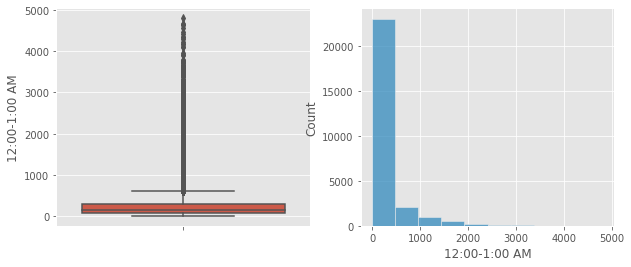

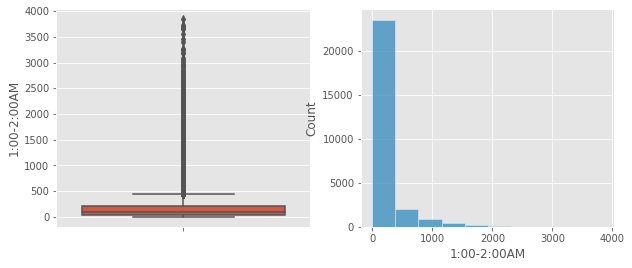

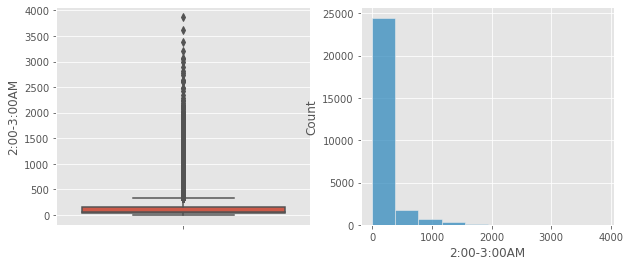

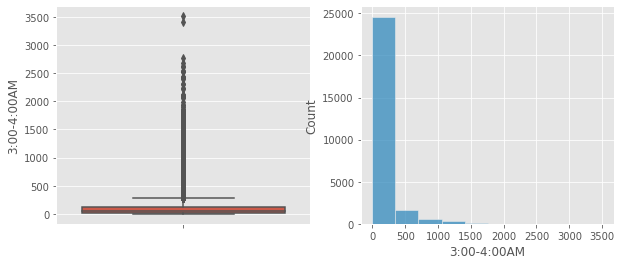

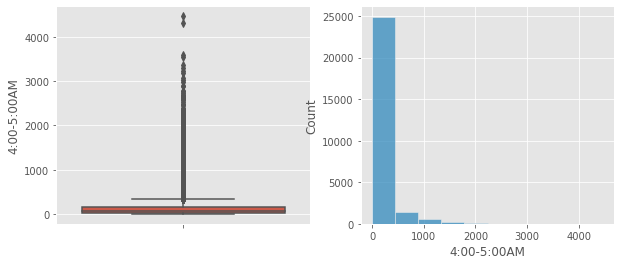

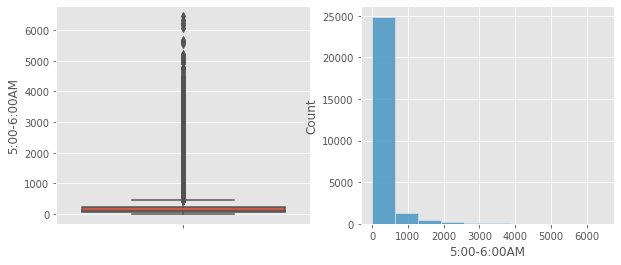

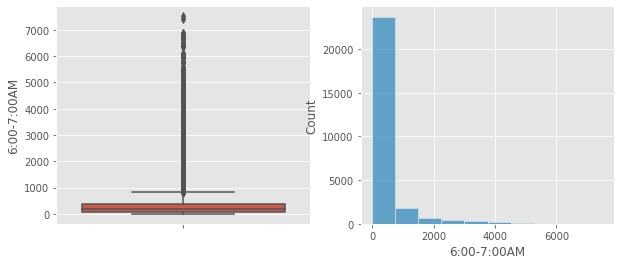

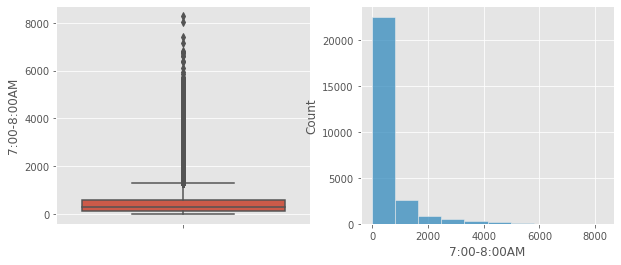

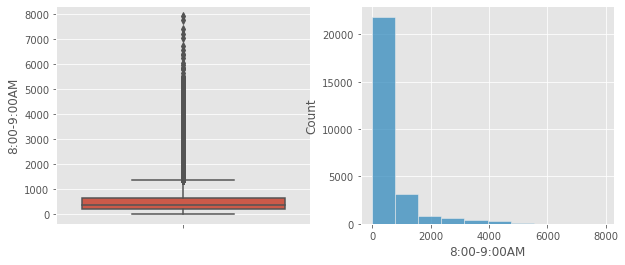

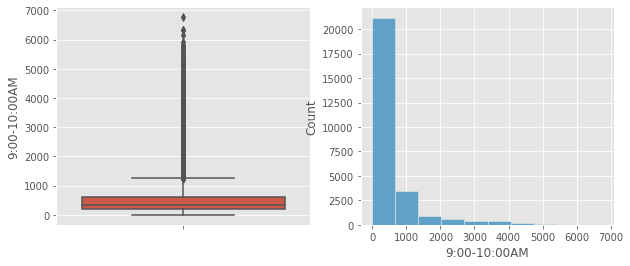

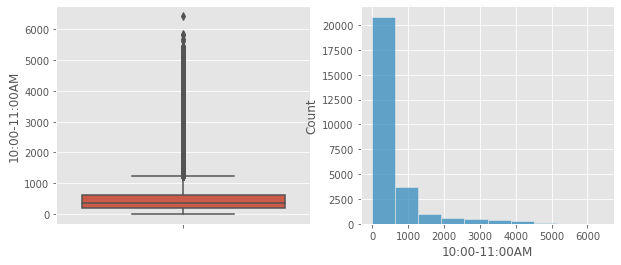

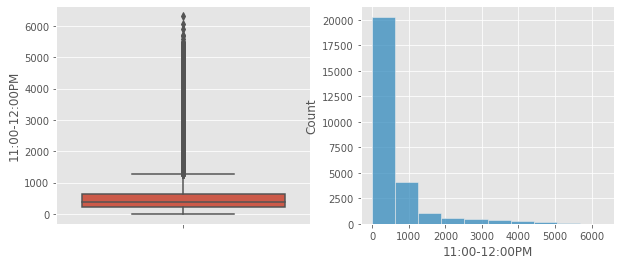

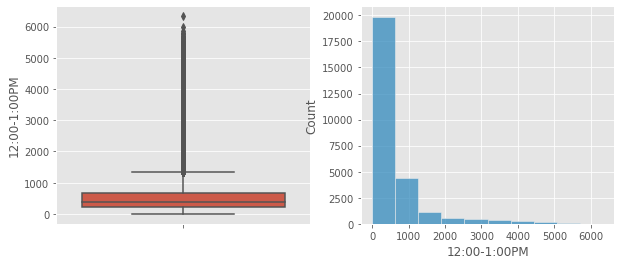

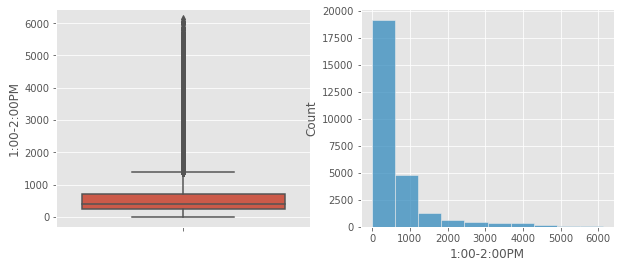

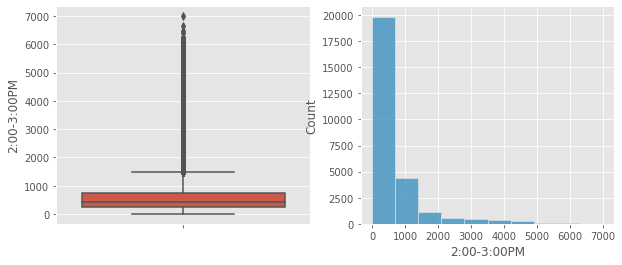

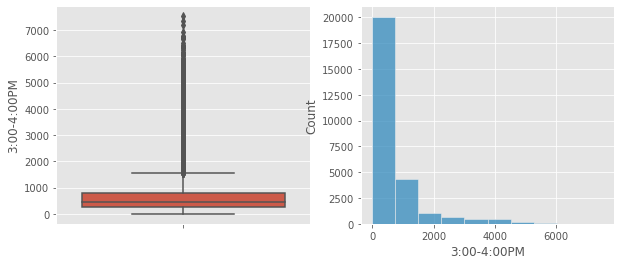

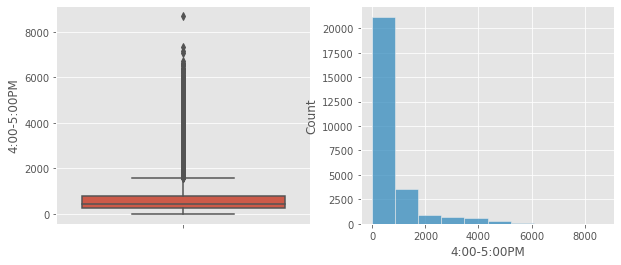

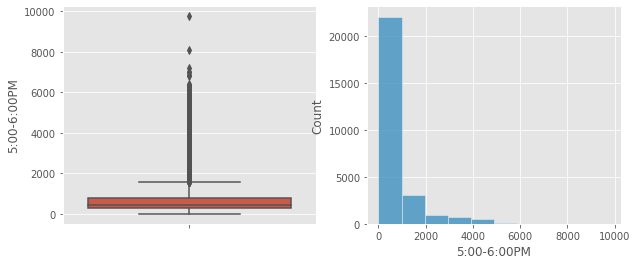

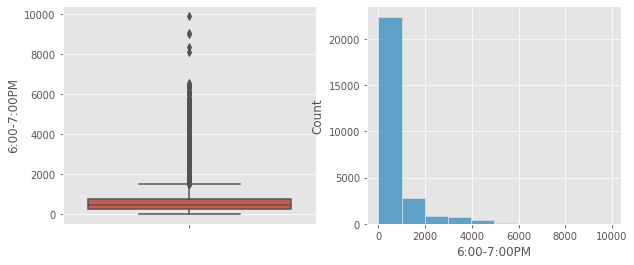

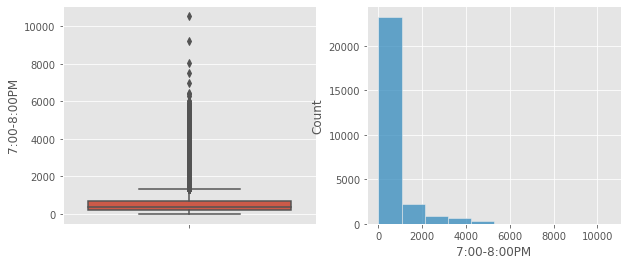

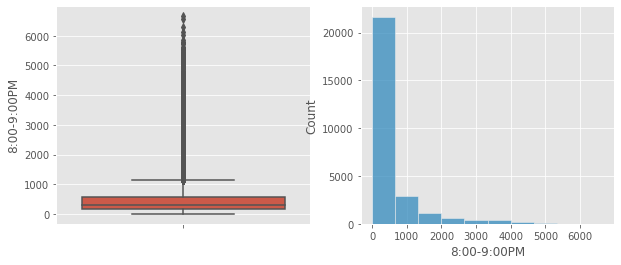

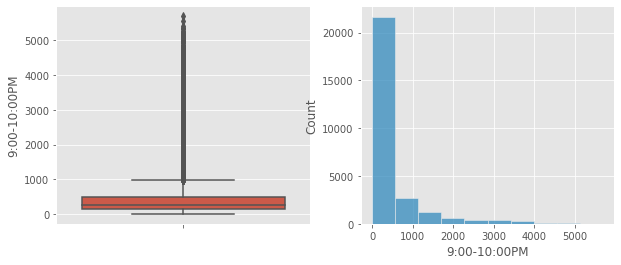

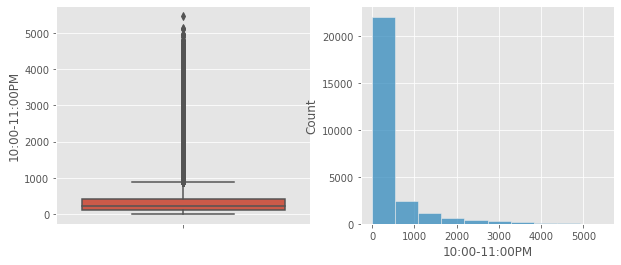

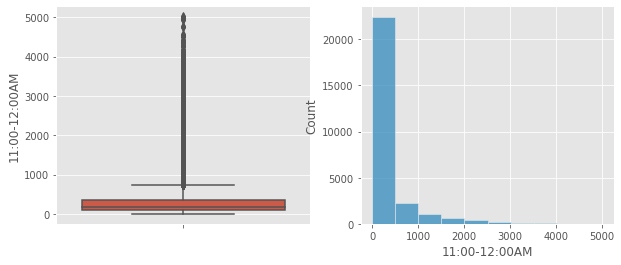

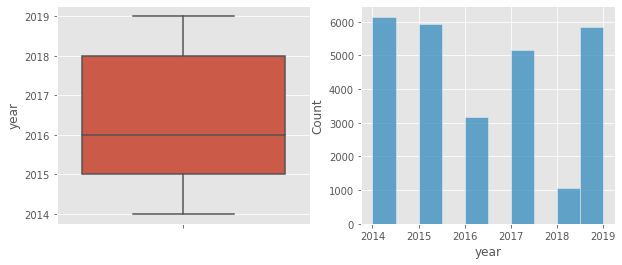

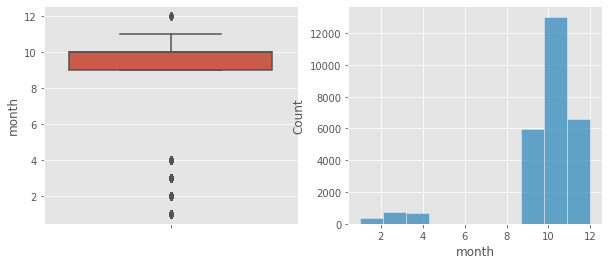

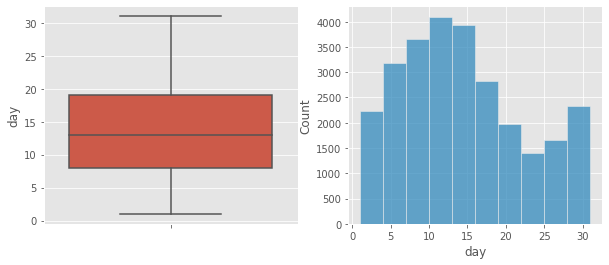

In [9]:
# import libraries for plotting
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot histograms and box plot of each attribute
for i in traffic.iloc[:,7:].columns:
    fig, axes = plt.subplots(1, 2,figsize=(10,4))
    sns.boxplot(ax=axes[0], y = i, data = traffic,orient='v')
    sns.histplot(data=traffic, ax=axes[1], x = i, bins=10)

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: R

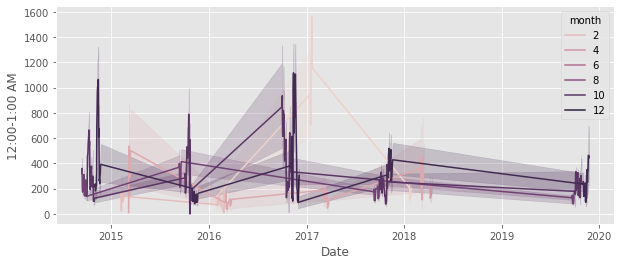

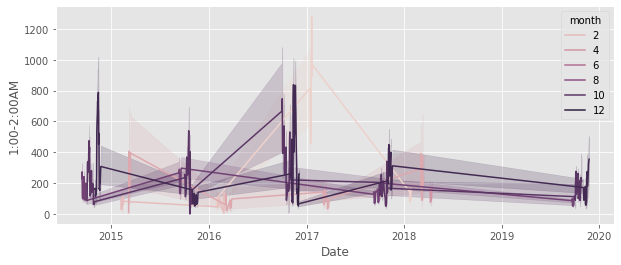

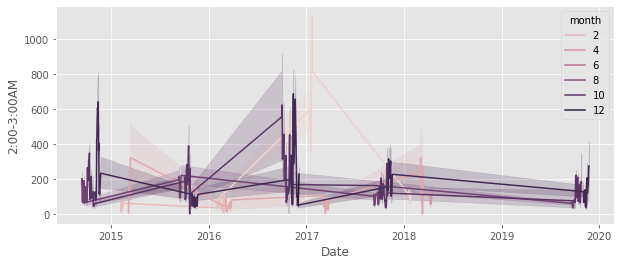

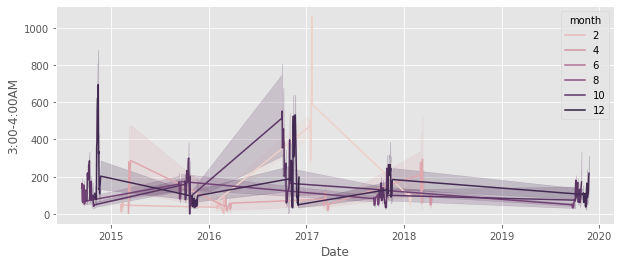

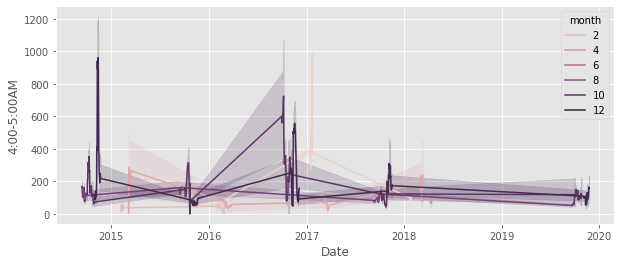

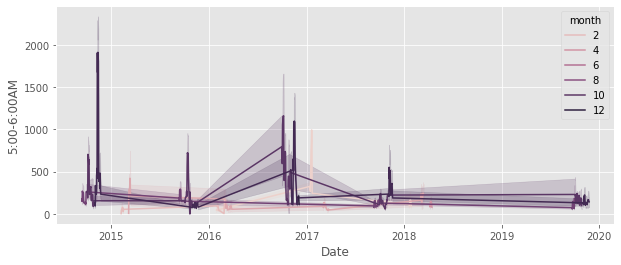

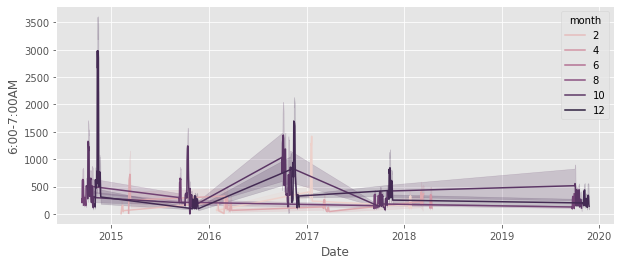

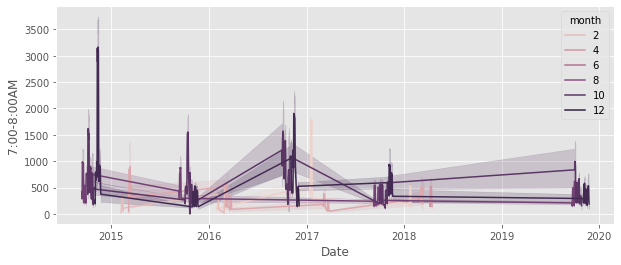

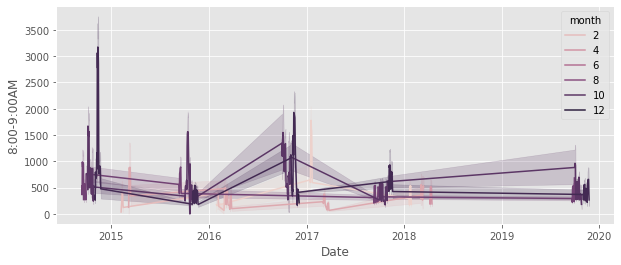

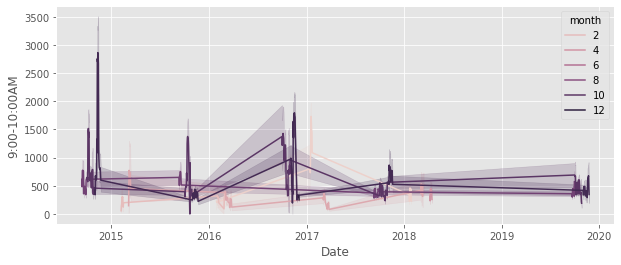

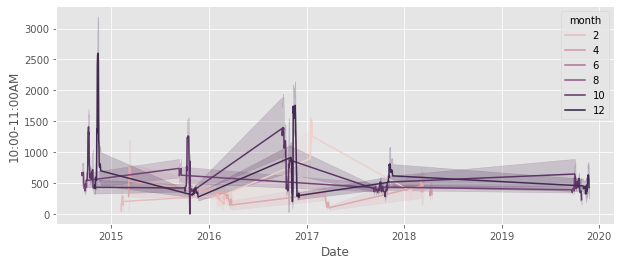

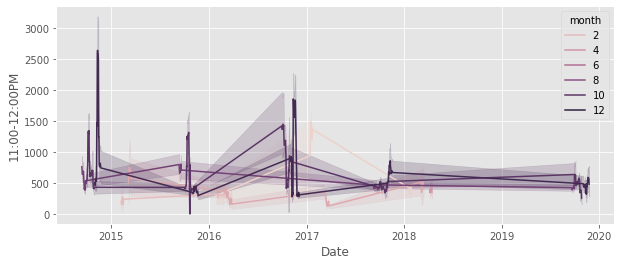

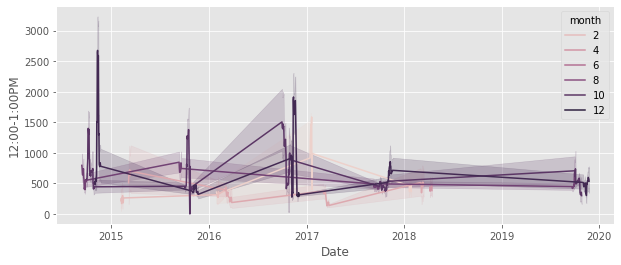

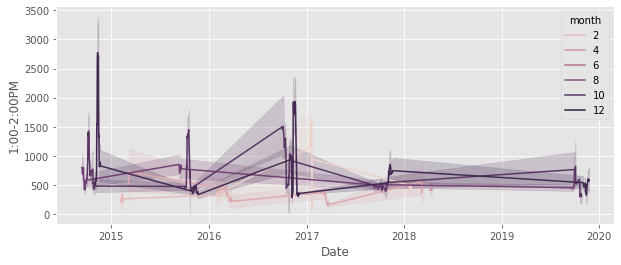

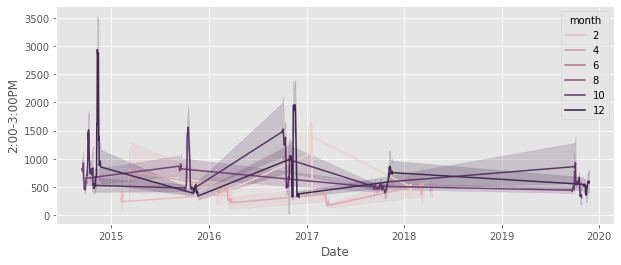

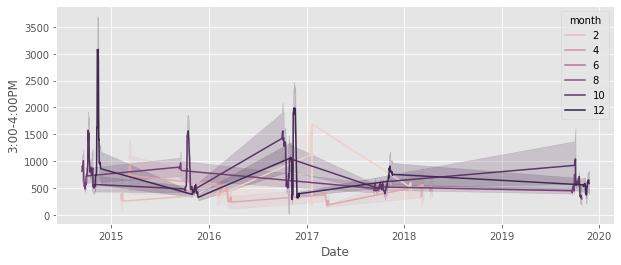

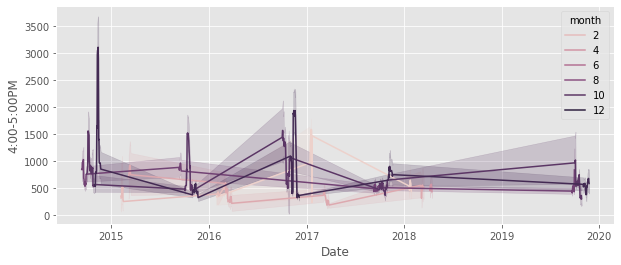

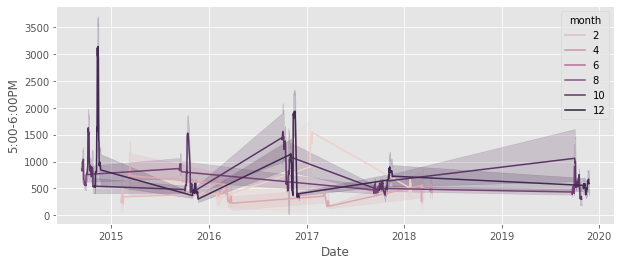

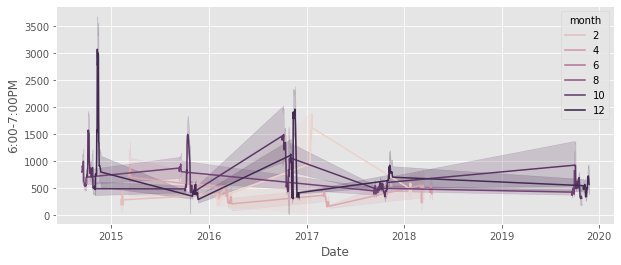

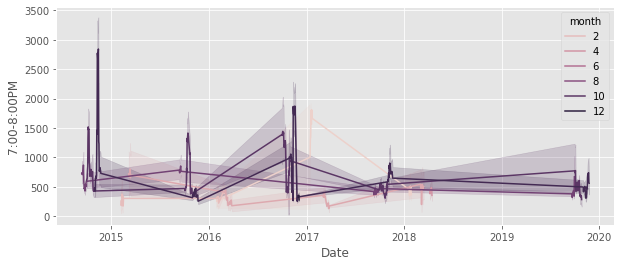

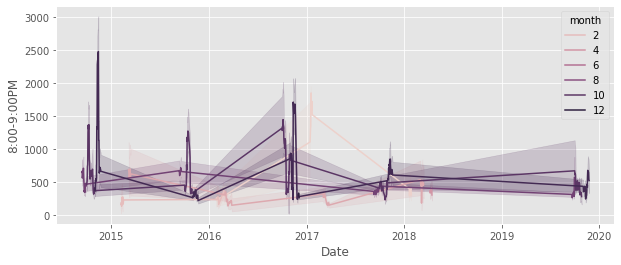

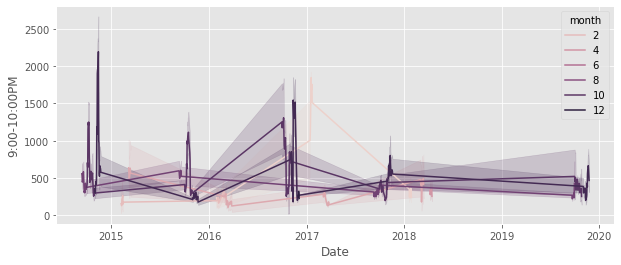

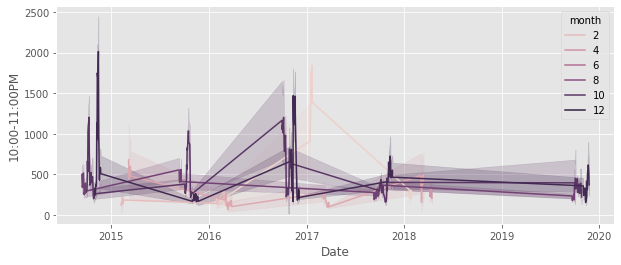

In [10]:
# plot traffic volume over time
for i in traffic.iloc[:,7:-4].columns:
    fig, axes = plt.subplots(1, 1,figsize=(10,4))
    sns.lineplot(data=traffic, x="Date", y= i, hue='month')

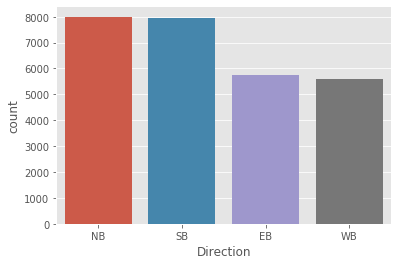

In [11]:
sns.countplot(x='Direction', data=traffic)

In [12]:
traffic['Roadway Name'].value_counts()

Broadway                  387
3 Avenue                  198
Southern Boulevard        184
3 AVENUE                  181
FDR Drive                 153
                         ... 
CENTRE STREET               9
EAST 119 STREET             9
5th AVENUE                  6
East 170  Service Road      1
East 170  Main Road         1
Name: Roadway Name, Length: 889, dtype: int64

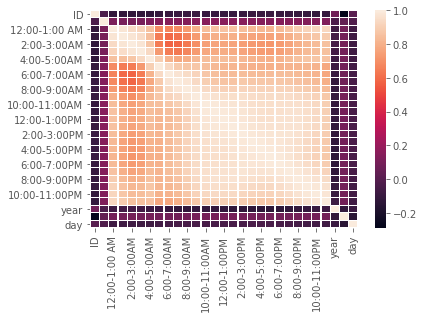

In [13]:
sns.heatmap(traffic.corr(),linewidths=.20)

In [14]:
traffic['morning_rush'] = traffic['6:00-7:00AM'] + traffic['8:00-9:00AM'] + traffic['10:00-11:00AM']
traffic['midday'] = traffic['12:00-1:00PM'] + traffic['2:00-3:00PM']
traffic['afternoon_rush'] = traffic['4:00-5:00PM'] + traffic['6:00-7:00PM']
traffic['evening'] = traffic['8:00-9:00PM'] + traffic['10:00-11:00PM'] + traffic['12:00-1:00 AM']
traffic['night'] = traffic['2:00-3:00AM'] + traffic['4:00-5:00AM'] 
traffic.head(4)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,10:00-11:00PM,11:00-12:00AM,year,month,day,morning_rush,midday,afternoon_rush,evening,night
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,2014-09-13,204.0,177.0,133.0,...,282,240,2014,9,13,730.0,1033,1155,918.0,274.0
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,2014-09-13,140.0,51.0,128.0,...,237,191,2014,9,13,696.0,782,747,659.0,272.0
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,2014-09-13,94.0,73.0,65.0,...,147,103,2014,9,13,416.0,524,477,440.0,129.0
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,2014-09-13,88.0,82.0,75.0,...,157,103,2014,9,13,474.0,494,440,431.0,140.0


In [15]:
#traffic['SurroundingTraffic']= i for i in len(range(traffic)) if 
traffic['RoadwayName'] == traffic['From'] | traffic['To'] & 
traffic['From']== traffic['RoadwayName'] | 
traffic['To']== traffic['RoadwayName']

SyntaxError: invalid syntax (<ipython-input-15-8c1fe582cc74>, line 2)

In [ ]:
traffic.loc[traffic['To'] == 'East 155 Street']